In [1]:
cd"dataset3"

/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-le-ins5/code/dataset3


In [4]:
# Hyperparams
IMAGE_SIZE = 224
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS =15
BATCH_SIZE =30
TEST_SIZE = 2
learning = 0.0001
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [5]:
import keras
from keras import layers
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from livelossplot import PlotLossesKeras

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [72]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from random import shuffle
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [40]:
final=load_model('final.h5')
final.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [44]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False)

Found 1003 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


Found 480 images belonging to 2 classes.
15/15 [==============================] - 0s 881us/step
Confusion Matrix


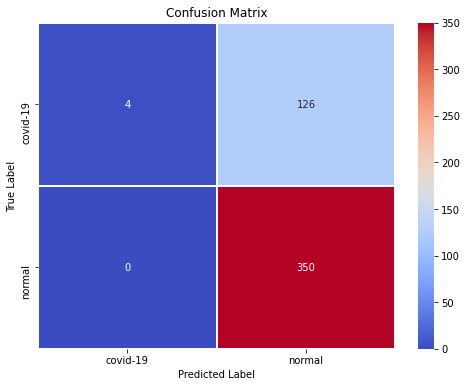

[[  4 126]
 [  0 350]]


In [75]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

LABELS = ["covid-19","normal"]

def show_confusion_matrix(validations, predictions):
    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False)    

filenames = validation_generator.filenames
nb_samples = len(filenames)

y_pred = final.predict(X_test, verbose=1)
y_pred = y_pred.clip(min=0.005, max=0.995)
print('Confusion Matrix')
show_confusion_matrix(validation_generator.classes, np.round(y_pred))
print(confusion_matrix(validation_generator.classes, np.round(y_pred)))

In [57]:
print('Classification Report')
target_names = ["covid-19","normal"]
print(classification_report(validation_generator.classes, np.round(y_pred), target_names=target_names))
# Plot linewidth.

Classification Report
              precision    recall  f1-score   support

    covid-19       1.00      0.03      0.06       130
      normal       0.74      1.00      0.85       350

    accuracy                           0.74       480
   macro avg       0.87      0.52      0.45       480
weighted avg       0.81      0.74      0.63       480



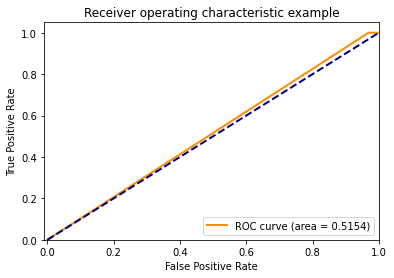

In [78]:
# Plot linewidth.
lw = 2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
   fpr[i], tpr[i], _ = roc_curve(validation_generator.classes, np.round(y_pred))
   roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
       lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()